In [ ]:
!pip3 install polygon-api-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 737.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib3-2.0.7
  Attempting uninstall: certifi
    Found existing installation: certifi 2024.2.2
    Uninstalling certifi-2024.2.2:
      Successfully uninstalled certifi-2024.2.2


In [ ]:
from polygon import RESTClient
client = RESTClient(api_key="qAECEY64BgfArsBJID6VYCJ1k0asFEll", trace=False)
ticker = "AAPL"

In [ ]:
%pip install numpy
%pip install datetime
import numpy as np
import datetime as dt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 756.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.3/247.3 kB 7.5 MB/s eta 0:00:00


In [ ]:
%pip install pandas
import pandas as pd

def get_stock_data_to_df(ticker):
    aggs = []
    B = client.list_aggs(ticker=ticker, multiplier=1, timespan="minute", from_="2023-01-01", to="2023-06-13", limit=50000)
    # for a in B:
    #     aggs.append(a)
    # items = aggs
    data = []
    for item in B:
        # print(dir(item))
        data.append({
            "open": item.open,
            "high": item.high,
            "low": item.low,
            "close": item.close,
            "volume": item.volume,
            "vwap": item.vwap,
            "timestamp": item.timestamp,
            "transactions": item.transactions,

        })
    return pd.DataFrame(data)

In [ ]:
def stationaryize(df : pd.DataFrame, time) -> pd.DataFrame:
    df['stationary'] = (np.log(df[time])).diff()
    df['timestamp_processed'] =  pd.to_datetime(df['timestamp'], unit='ms')
    df = df.dropna(how = 'any', axis = 0, )
    return df

def get_clean_data(ticker, open_or_close) -> pd.DataFrame:
    return stationaryize(get_stock_data_to_df(ticker.upper()), open_or_close)

In [ ]:
aapl_df = get_clean_data("aapl", 'close')
# aapl_df = aapl_df.iloc[1:-1]
# aapl_df.head(-25)

In [ ]:
aapl_df.head()

,open,high,low,close,volume,vwap,timestamp,transactions,stationary,timestamp_processed
1,130.87,131.17,130.87,131.10,8820.0,130.9552,1672736460000,157,0.000763,2023-01-03 09:01:00
2,131.18,131.24,131.17,131.17,2112.0,131.2088,1672736520000,53,0.000534,2023-01-03 09:02:00
3,131.19,131.29,131.19,131.28,3888.0,131.2208,1672736580000,90,0.000838,2023-01-03 09:03:00
4,131.28,131.46,131.28,131.46,5984.0,131.3279,1672736640000,88,0.001370,2023-01-03 09:04:00
5,131.36,131.44,131.30,131.30,9328.0,131.3368,1672736700000,157,-0.001218,2023-01-03 09:05:00


In [ ]:
tsla_df = get_clean_data("aapl", 'close')
tsla_df.head()
# print(np.shape(tsla_df))

,open,high,low,close,volume,vwap,timestamp,transactions,stationary,timestamp_processed
1,130.87,131.17,130.87,131.10,8820.0,130.9552,1672736460000,157,0.000763,2023-01-03 09:01:00
2,131.18,131.24,131.17,131.17,2112.0,131.2088,1672736520000,53,0.000534,2023-01-03 09:02:00
3,131.19,131.29,131.19,131.28,3888.0,131.2208,1672736580000,90,0.000838,2023-01-03 09:03:00
4,131.28,131.46,131.28,131.46,5984.0,131.3279,1672736640000,88,0.001370,2023-01-03 09:04:00
5,131.36,131.44,131.30,131.30,9328.0,131.3368,1672736700000,157,-0.001218,2023-01-03 09:05:00


In [ ]:
nvda_df = get_clean_data("aapl", 'close')
nvda_df.head()

,open,high,low,close,volume,vwap,timestamp,transactions,stationary,timestamp_processed
1,130.87,131.17,130.87,131.10,8820.0,130.9552,1672736460000,157,0.000763,2023-01-03 09:01:00
2,131.18,131.24,131.17,131.17,2112.0,131.2088,1672736520000,53,0.000534,2023-01-03 09:02:00
3,131.19,131.29,131.19,131.28,3888.0,131.2208,1672736580000,90,0.000838,2023-01-03 09:03:00
4,131.28,131.46,131.28,131.46,5984.0,131.3279,1672736640000,88,0.001370,2023-01-03 09:04:00
5,131.36,131.44,131.30,131.30,9328.0,131.3368,1672736700000,157,-0.001218,2023-01-03 09:05:00


In [ ]:
merged_try1_df = pd.merge(aapl_df[['timestamp_processed', 'stationary']], tsla_df[['timestamp_processed', 'stationary']], on='timestamp_processed', how='right').rename(columns = {'stationary_x':'apple', 'stationary_y':'tesla'})


In [ ]:
def merge_df(ticker1, ticker2, open_or_close):
    df1 = get_clean_data(ticker1, open_or_close)
    df2 = get_clean_data(ticker2, open_or_close)
    return pd.merge(df1[['timestamp_processed', 'stationary']], df2[['timestamp_processed', 'stationary']], on='timestamp_processed', how='right').rename(columns = {'stationary_x': ticker1, 'stationary_y': ticker2}).dropna(how='any')




In [ ]:
!pip3 install statsmodels

In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

In [ ]:
a= merge_df('goog','tsla', 'close')
a.head()

,timestamp_processed,goog,tsla
0,2023-01-03 09:01:00,0.004236,0.006977
3,2023-01-03 09:04:00,0.000667,-0.003598
4,2023-01-03 09:05:00,0.000000,-0.001426
5,2023-01-03 09:06:00,-0.000334,-0.001008
10,2023-01-03 09:11:00,0.000334,0.000169


In [14]:
%pip install yfinance
%pip install matplotlib
%pip install polygon-api-client
%pip install statsmodels
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 809.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.8 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.5/9.8 MB 4.8 MB/s eta 0:00:02
   ----- ---------------------------------- 1.3/9.8 MB 9.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.4/9.8 MB 12.6 MB/s eta 0:00:01
   -------------- ------------------------- 3.6/9.8 MB 15.2 MB/s eta 0:00:01
   -------------------- ------------------- 5.

In [47]:
import yfinance as yf
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

from polygon import RESTClient
client = RESTClient(api_key="qAECEY64BgfArsBJID6VYCJ1k0asFEll", trace=False)
ticker = "AAPL"

import warnings
warnings.filterwarnings('ignore')

In [46]:
def get_stock_data_to_df(ticker, use_yf = False):
    # print("yf = " + str(use_yf))
    aggs = []
    if not use_yf:
      B = client.list_aggs(ticker=ticker, multiplier=1, timespan="day", from_="2023-08-01", to="2024-02-01", limit=50000)
      data = []
      for item in B:
          # print(dir(item))
          data.append({
              "open": item.open,
              "high": item.high,
              "low": item.low,
              "close": item.close,
              "volume": item.volume,
              "vwap": item.vwap,
              "timestamp": item.timestamp,
              "transactions": item.transactions,

          })
      return pd.DataFrame(data)
    else:
      ticker = yf.Ticker(str(ticker))
      df = ticker.history(period = '6mo', interval='1d')
      df.reset_index(inplace=True)
      df["timestamp_processed"] = [e.strftime('%Y-%m-%d') for e in df["Date"]]
      return df
    

def merge_df(ticker1, ticker2, open_or_close, use_yf = False):
    df1 = get_clean_data(ticker1, open_or_close, use_yf = use_yf)
    df2 = get_clean_data(ticker2, open_or_close, use_yf = use_yf)
    return pd.merge(df1[['timestamp_processed', 'stationary']], df2[['timestamp_processed', 'stationary']], on='timestamp_processed', how='right').rename(columns = {'stationary_x': ticker1, 'stationary_y': ticker2}).dropna(how='any')

def stationaryize(df : pd.DataFrame, time, use_yf = False) -> pd.DataFrame:
    df['stationary'] = (np.log(df[time])).diff()
    if not use_yf:
      df['timestamp_processed'] =  pd.to_datetime(df['timestamp'], unit='ms')
    df = df.dropna(how = 'any', axis = 0, )
    return df

def get_clean_data(ticker, open_or_close, use_yf) -> pd.DataFrame:
    return stationaryize(get_stock_data_to_df(ticker.upper(), use_yf = use_yf), open_or_close, use_yf = use_yf)

def get_all_tickers(client=None) -> list[str]:
    # response = client.get_snapshot_all('stocks')
    # tickers = [i.ticker for i in response]
    # return tickers
    return ['AAPL', 'GOOG', 'AMD', 'NVDA', 'ARE', 'AMX', 'COF', 'CVX', 'F', 'MA']

def get_test_results(use_yf = False):
    tickers = get_all_tickers()
    all_correlations = [[-1 for i in range(len(tickers))] for j in range(len(tickers))]
    # all_trials = len(tickers) * (len(tickers) - 1) // 2
    # success = 0
    for ticker1 in range(len(tickers)):
        for ticker2 in range(len(tickers)):
            # print(f'{success} / {all_trials} done')
            if ticker1 == ticker2:
              # success += 1
              all_correlations[ticker1][ticker2] = 1
            else:
              t1 = tickers[ticker1]
              t2 = tickers[ticker2]
              # try:
              merged = merge_df(t1, t2,'Close' if use_yf else 'close', use_yf = use_yf)
              # print(merged)
              temp = grangercausalitytests(merged[[t1, t2]], 7, verbose = False);
              test = [temp[key][0]['ssr_ftest'] for key in temp.keys()]
              best_corr = max(test, key = lambda x: x[1])
              # success += 1
              # all_correlations[ticker1][ticker2] = best_corr[0] if best_corr[0] < 10 and best_corr[1] < 0.2 else -1
              # all_correlations[ticker1][ticker2] = best_corr[0] if best_corr[1] < 0.5 else -1
              all_correlations[ticker1][ticker2] = best_corr[0] 
    return all_correlations

getting all data correlations
done getting all correlations
(10, 10)


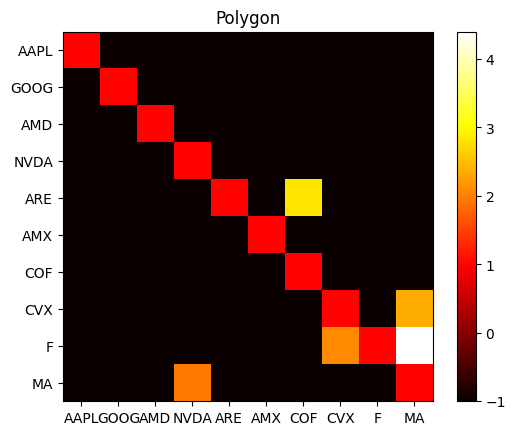

In [52]:
print("getting all data correlations")
all_correlations = get_test_results()
print("done getting all correlations")
print(np.shape(all_correlations))
plt.imshow(all_correlations, cmap='hot', interpolation='nearest')
tickers = get_all_tickers(client)
plt.xticks(ticks = [i for i in range(len(tickers))], labels = get_all_tickers(client))
plt.yticks(ticks = [i for i in range(len(tickers))], labels = get_all_tickers(client))
plt.colorbar()
plt.title('Polygon')
plt.savefig('./big_correlation_map_25')

getting all data correlations
done getting all correlations
(10, 10)


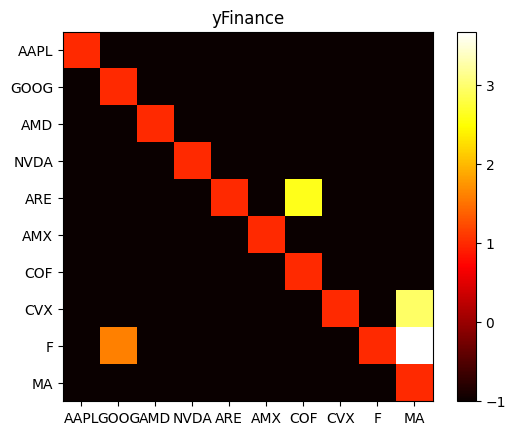

In [53]:
print("getting all data correlations")
all_correlations = get_test_results(use_yf = True)
print("done getting all correlations")
print(np.shape(all_correlations))
plt.imshow(all_correlations, cmap='hot', interpolation='nearest')
tickers = get_all_tickers(client)
plt.xticks(ticks = [i for i in range(len(tickers))], labels = get_all_tickers(client))
plt.yticks(ticks = [i for i in range(len(tickers))], labels = get_all_tickers(client))
plt.colorbar()
plt.title('yFinance')
plt.savefig('./big_correlation_map_25_yf')

In [18]:
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7814891/
# On the Sensitivity of Granger Causality to Errors‐In‐Variables, Linear Transformations and Subsampling
'''
This article studies the sensitivity of Granger causality to the addition of noise, the introduction of subsampling, and the application of causal invertible filters to weakly stationary processes.
Using canonical spectral factors and Wold decompositions, we give general conditions under which additive noise or filtering distorts Granger‐causal properties by inducing (spurious) Granger causality,
as well as conditions under which it does not. For the errors‐in‐variables case, we give a continuity result, which implies that: a ‘small’ noise‐to‐signal ratio entails ‘small’ distortions in Granger
causality. On filtering, we give general necessary and sufficient conditions under which ‘spurious’ causal relations between (vector) time series are not induced by linear transformations of the variables
involved. This also yields transformations (or filters) which can eliminate Granger causality from one vector to another one. In a number of cases, we clarify results in the existing literature, with a
number of calculations streamlining some existing approaches.
'''
#TLDR: Noise and causal linear transformations can "trick" Granger causality
# f X B is not noisy [N B = 0], noise associated with the ‘causal variable’ X A cannot induce spurious Granger causality from X A to X B,
#despite possibly complicated dynamics on both X A and X B. Another special case of interest is provided by the situation where the two processes are actually independent.
# Then ΦAB = 0, and so the relevant transfer function ΦABΦ−1BB with or without noise added remains zero and there is no causality introduced through the addition of noise.

'\nThis article studies the sensitivity of Granger causality to the addition of noise, the introduction of subsampling, and the application of causal invertible filters to weakly stationary processes.\nUsing canonical spectral factors and Wold decompositions, we give general conditions under which additive noise or filtering distorts Granger‐causal properties by inducing (spurious) Granger causality,\nas well as conditions under which it does not. For the errors‐in‐variables case, we give a continuity result, which implies that: a ‘small’ noise‐to‐signal ratio entails ‘small’ distortions in Granger\ncausality. On filtering, we give general necessary and sufficient conditions under which ‘spurious’ causal relations between (vector) time series are not induced by linear transformations of the variables\ninvolved. This also yields transformations (or filters) which can eliminate Granger causality from one vector to another one. In a number of cases, we clarify results in the existing lite